### CNN Face Detector DLib

* dlib is a toolkit for making real world machine learning and data analysis applications in C++. While the library is originally written in C++, it has good, easy to use Python bindings.
* We can use the CNN based face detector from dlib on images and compare the results with HOG based detector.
* CNN based detector is computationally heavy and is not suitable for real-time video at the moment. 


Reference: https://towardsdatascience.com/cnn-based-face-detector-from-dlib-c3696195e01c

In [0]:
# Get the model weights 
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat 

In [0]:
import numpy as np
import urllib.request 
import cv2
from google.colab.patches import cv2_imshow
import dlib
import argparse
import time

urls = [
  'https://user-images.githubusercontent.com/15984084/69748280-ff446000-116d-11ea-9fc5-9dad294f76ea.jpg',
  'https://user-images.githubusercontent.com/15984084/69748275-feabc980-116d-11ea-845a-6fef3ef1916b.jpg',
  'https://user-images.githubusercontent.com/15984084/69748276-feabc980-116d-11ea-9142-7c4f1889a7e3.jpg',
  'https://user-images.githubusercontent.com/15984084/69748277-ff446000-116d-11ea-857b-2f38737e6904.jpg',
  'https://user-images.githubusercontent.com/15984084/69748278-ff446000-116d-11ea-872d-5cbf5ed45ba4.jpg',
  'https://user-images.githubusercontent.com/15984084/69748281-ff446000-116d-11ea-867f-636696b5176f.jpg']

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

In [0]:
########### HOG Face Detector ##################
def drawHOGFaceDetector(image):
  start = time.time()
  # apply face detection (hog)
  faces_hog = hog_face_detector(image, 1)
  end = time.time()
  print("Execution Time (in seconds) :")
  print("HOG : ", format(end - start, '.2f'))
  # loop over detected faces
  for face in faces_hog:
      x = face.left()
      y = face.top()
      w = face.right() - x
      h = face.bottom() - y

      # draw box over face
      cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

########### CNN Face Detector ##################
def drawCNNFaceDetector(image):
  start = time.time()
  # apply face detection (cnn)
  faces_cnn = cnn_face_detector(image, 1)
  end = time.time()
  print("CNN : ", format(end - start, '.2f'))
  # loop over detected faces
  for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

########### DISPLAY Results ##################
def displayResults(image):
  # write at the top left corner of the image
  # for color identification
  img_height, img_width = image.shape[:2]
  cv2.putText(image, "HOG", (img_width-50,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                  (0,255,0), 2)
  cv2.putText(image, "CNN", (img_width-50,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                  (0,0,255), 2)
  # display output image
  # cv2.imshow("face detection with dlib", image)
  cv2_imshow(image)
  cv2.waitKey()
  # save output image 
  cv2.imwrite("cnn_face_detection.png", image)
  # close all windows
  cv2.destroyAllWindows()

org image size =  (207, 243, 3)
resized image size =  (200, 200, 3)
CNN :  0.02
Execution Time (in seconds) :
HOG :  0.03


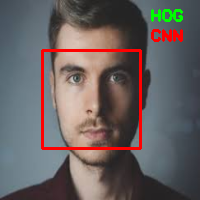

--------------------------
org image size =  (1500, 1000, 3)
resized image size =  (200, 200, 3)
CNN :  0.01
Execution Time (in seconds) :
HOG :  0.03


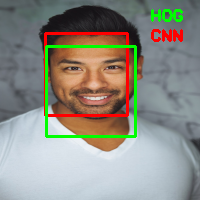

--------------------------
org image size =  (675, 1200, 3)
resized image size =  (200, 200, 3)
CNN :  0.01
Execution Time (in seconds) :
HOG :  0.03


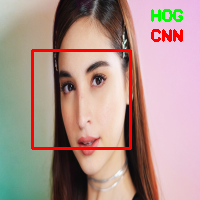

--------------------------
org image size =  (628, 1200, 3)
resized image size =  (200, 200, 3)
CNN :  0.01
Execution Time (in seconds) :
HOG :  0.03


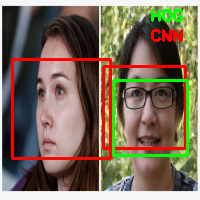

--------------------------
org image size =  (400, 550, 3)
resized image size =  (200, 200, 3)
CNN :  0.01
Execution Time (in seconds) :
HOG :  0.03


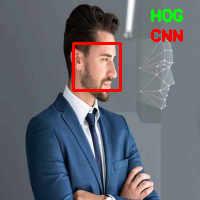

--------------------------
org image size =  (533, 799, 3)
resized image size =  (200, 200, 3)
CNN :  0.01
Execution Time (in seconds) :
HOG :  0.03


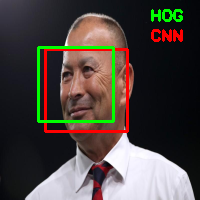

--------------------------


In [9]:
# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

for each in urls:
  image = url_to_image(each)
  print("org image size = ", image.shape)
  dim = (200, 200)
  image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  print("resized image size = ", image.shape)

  if image is None:
      print("Could not read input image")
  drawCNNFaceDetector(image)
  drawHOGFaceDetector(image)
  displayResults(image)
  print("--------------------------")

We observed that the CNN based detector works really well for non-frontal faces at odd angles where HOG based detector struggles.
